In [59]:
## AI system used: ChatGPT 3.5

In [60]:
## Load Necessary Libraries

In [61]:
# Load necessary libraries and modules

import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import plotly.express as px  # For interactive data visualization

# For machine learning and evaluation
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the features
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier

# For evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [62]:
## Load the Data

In [63]:
# Prompt given: assign the string of the file name to a variable called file_path, 
# and then read the file into a variable called transaction_data_raw

In [64]:
# Assign the file name to a variable
file_path = "card_transdata.csv"

# Read the CSV file into a DataFrame
transaction_data_raw = pd.read_csv(file_path)

# Display the first few rows of the data to confirm it was loaded correctly
transaction_data_raw.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


In [65]:
# Print the shape of the dataset
transaction_data_raw.shape

(999, 8)

In [66]:
# Print the info of the dataset
transaction_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [67]:
# Print the descriptive statistics of the dataset
transaction_data_raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
## Data Wrangling

In [69]:
# Check for the number of missing values in each column
transaction_data_raw.isnull().sum()

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

In [70]:
# Prompt given: write 2-3 sentences discussing options about what to do with the missing values

In [71]:
# To handle missing values, you can either drop the rows or columns with missing data if they are minimal,
# or impute the missing values using the mean, median, or mode for numerical and categorical columns. 
# Another option is to use machine learning models to predict and fill in missing values. 
# The choice depends on the amount of missing data and the impact on the analysis.

In [72]:
# Drop rows with null values and print the shape of the updated DataFrame
transaction_data_cleaned = transaction_data_raw.dropna()
transaction_data_cleaned.shape

(977, 8)

In [73]:
# Show the first few rows of the updated DataFrame
transaction_data_cleaned.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


In [74]:
## Visualize the Data

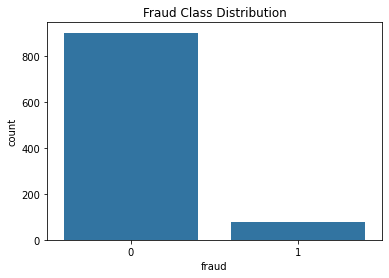

In [75]:
# Create a countplot for the 'fraud' column
sns.countplot(x='fraud', data=transaction_data_cleaned)
plt.title('Fraud Class Distribution')
plt.show()

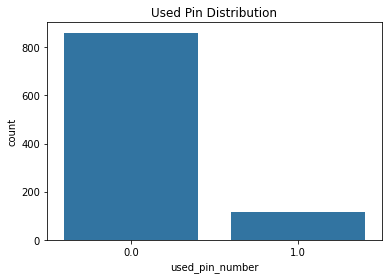

In [76]:
# Create a countplot for the 'used_pin_number' column
sns.countplot(x='used_pin_number', data=transaction_data_cleaned)
plt.title('Used Pin Distribution')
plt.show()

In [77]:
# Prompt given: same thing with repeat_retailer

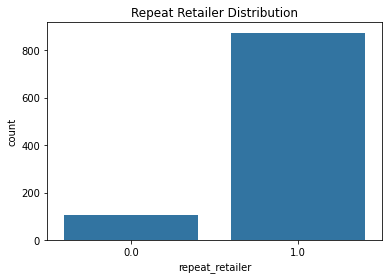

In [78]:
# Create a countplot for the 'repeat_retailer' column
sns.countplot(x='repeat_retailer', data=transaction_data_cleaned)
plt.title('Repeat Retailer Distribution')
plt.show()

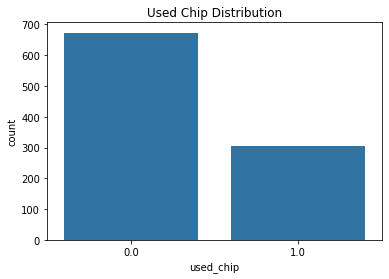

In [79]:
# Create a countplot for the 'used_chip' column
sns.countplot(x='used_chip', data=transaction_data_cleaned)
plt.title('Used Chip Distribution')
plt.show()

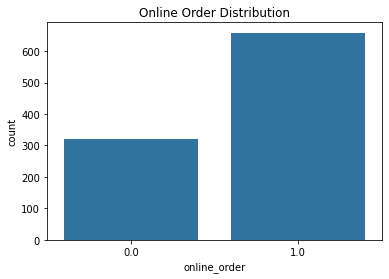

In [80]:
# Create a countplot for the 'online_order' column
sns.countplot(x='online_order', data=transaction_data_cleaned)
plt.title('Online Order Distribution')
plt.show()

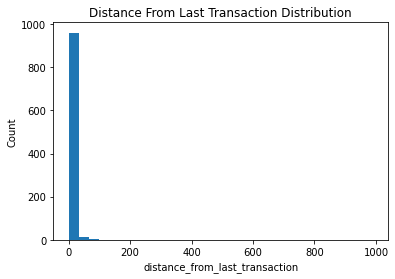

In [81]:
# Create a histogram for the 'distance_from_last_transaction' column with labels
plt.hist(transaction_data_cleaned['distance_from_last_transaction'], bins=30)
plt.title('Distance From Last Transaction Distribution')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('Count')
plt.show()

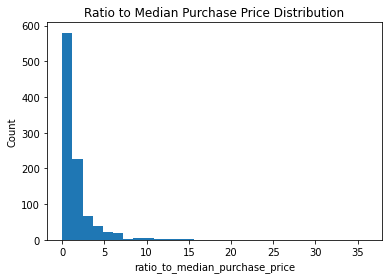

In [82]:
# Create a histogram for the 'ratio_to_median_purchase_price' column with labels
plt.hist(transaction_data_cleaned['ratio_to_median_purchase_price'], bins=30)
plt.title('Ratio to Median Purchase Price Distribution')
plt.xlabel('ratio_to_median_purchase_price')
plt.ylabel('Count')
plt.show()

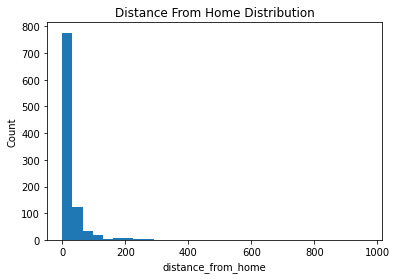

In [83]:
# Create a histogram for the 'distance_from_home' column with labels
plt.hist(transaction_data_cleaned['distance_from_home'], bins=30)
plt.title('Distance From Home Distribution')
plt.xlabel('distance_from_home')
plt.ylabel('Count')
plt.show()

In [84]:
## Better Visualizations

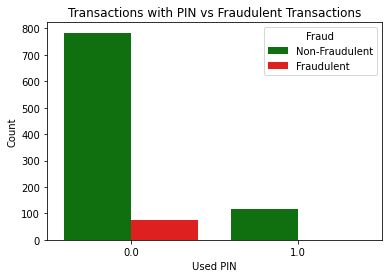

In [85]:
# Create a countplot for 'used_pin_number' with 'fraud' as hue
sns.countplot(x='used_pin_number', hue='fraud', data=transaction_data_cleaned, palette=['green', 'red'])

# Customize the title and labels
plt.title('Transactions with PIN vs Fraudulent Transactions')
plt.xlabel('Used PIN')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

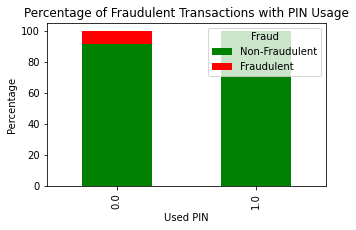

In [86]:
# Create a dataframe grouped by 'used_pin_number' showing the value counts of 'fraud'
df_pin_fraud = transaction_data_cleaned.groupby('used_pin_number')['fraud'].value_counts(normalize=True).unstack() * 100 

# Create a countplot
df_pin_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(5, 3))

# Customize the title and labels
plt.title('Percentage of Fraudulent Transactions with PIN Usage')
plt.xlabel('Used PIN')
plt.ylabel('Percentage')

# Display the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

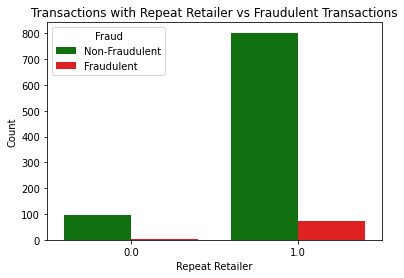

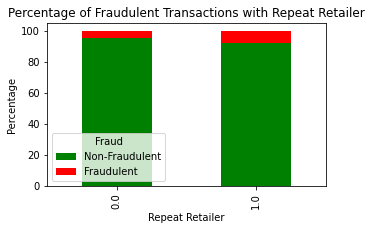

In [87]:
# Create a count plot of repeat_retailer
sns.countplot(data=transaction_data_cleaned, x='repeat_retailer', hue='fraud', palette=['green', 'red'])

# Customize the title and labels
plt.title('Transactions with Repeat Retailer vs Fraudulent Transactions')
plt.xlabel('Repeat Retailer')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

# Create a percentage plot to show the percentage of fraudulent transactions when a transaction was from the same retailer or not
df_retailer_fraud = transaction_data_cleaned.groupby('repeat_retailer')['fraud'].value_counts(normalize=True).unstack() * 100

df_retailer_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(5, 3))

# Customize the title and labels
plt.title('Percentage of Fraudulent Transactions with Repeat Retailer')
plt.xlabel('Repeat Retailer')
plt.ylabel('Percentage')

# Display the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

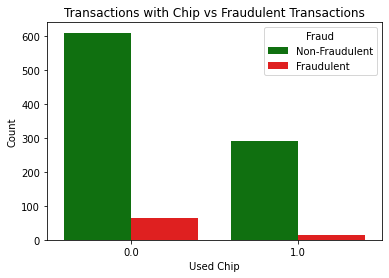

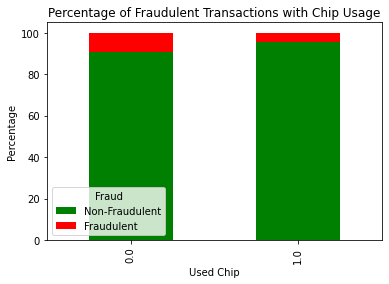

In [88]:
# Create a count plot with 'used_chip' on the x-axis with 'fraud' as hue
sns.countplot(data=transaction_data_cleaned, x='used_chip', hue='fraud', palette=['green', 'red'])

# Customize the title and labels
plt.title('Transactions with Chip vs Fraudulent Transactions')
plt.xlabel('Used Chip')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

df_chip_fraud = transaction_data_cleaned.groupby('used_chip')['fraud'].value_counts(normalize=True).unstack() * 100

# Create a percentage plot to how many fraudulent transactions occured when a chip was or was not used
df_chip_fraud.plot(kind='bar', stacked=True, color=['green', 'red'])

# Customize the title and labels
plt.title('Percentage of Fraudulent Transactions with Chip Usage')
plt.xlabel('Used Chip')
plt.ylabel('Percentage')

# Display the legend
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

In [89]:
# Prompt given: same thing with online_order

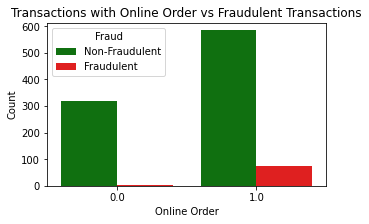

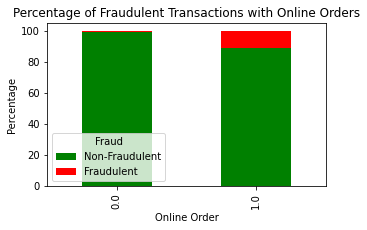

In [90]:
# Create a count plot to show the number of transactions that were fraudulent vs non-fraudulent when an online order was placed or not
plt.figure(figsize=(5, 3))  # Set the figure size for better readability
sns.countplot(data=transaction_data_cleaned, x='online_order', hue='fraud', palette=['green', 'red'])  
# countplot: x-axis is 'online_order', hue differentiates between 'fraud' (green for non-fraudulent, red for fraudulent)
plt.title('Transactions with Online Order vs Fraudulent Transactions')  # Add a title to the plot
plt.xlabel('Online Order')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])  # Add a legend for 'fraud' column (non-fraudulent in green, fraudulent in red)
plt.show()  # Display the plot

# Create a percentage plot to show the percentage of fraudulent transactions when an online order was placed or not
# Group data by 'online_order' and 'fraud' to calculate the percentage of fraudulent transactions in each group
df_online_order_fraud = transaction_data_cleaned.groupby('online_order')['fraud'].value_counts(normalize=True).unstack() * 100
# unstack() converts the 'fraud' values into separate columns for better visualization, and multiply by 100 to get percentages

# Plot the percentage distribution as a stacked bar chart, where green is non-fraudulent and red is fraudulent
df_online_order_fraud.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(5, 3))  
plt.title('Percentage of Fraudulent Transactions with Online Orders')  # Add a title to the plot
plt.xlabel('Online Order')  # Label for the x-axis
plt.ylabel('Percentage')  # Label for the y-axis
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])  # Add a legend to explain the color coding
plt.show()  # Display the plot

In [91]:
## Bivariate Visualizations

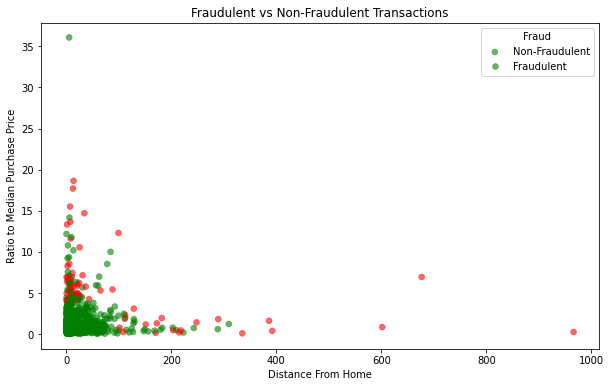

In [92]:
# Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))  # Set figure size for better visibility

# Plot a scatter plot where 'distance_from_home' is on the x-axis and 'ratio_to_median_purchase_price' is on the y-axis
# Use 'fraud' to color the points (red for fraudulent, green for non-fraudulent)
sns.scatterplot(data=transaction_data_cleaned, 
                x='distance_from_home', 
                y='ratio_to_median_purchase_price', 
                hue='fraud', 
                palette=['green', 'red'], 
                alpha=0.6,  # Adjust transparency for better visibility of overlapping points
                edgecolor=None)  # Remove edgecolor for cleaner visualization

# Set the title and labels for the plot
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Distance From Home')
plt.ylabel('Ratio to Median Purchase Price')

# Display the legend to indicate what colors represent fraudulent vs non-fraudulent transactions
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

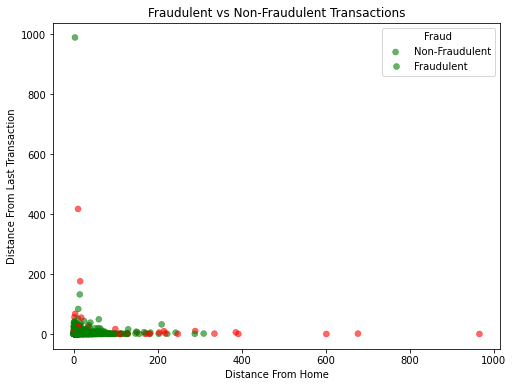

In [93]:
# Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility

# Plot the scatter plot with 'distance_from_home' on the x-axis and 'distance_from_last_transaction' on the y-axis
# Color the points based on fraud status using 'hue'
sns.scatterplot(data=transaction_data_cleaned, 
                x='distance_from_home', 
                y='distance_from_last_transaction', 
                hue='fraud', 
                palette=['green', 'red'],  # Green for non-fraudulent, Red for fraudulent
                alpha=0.6,  # Adjust transparency to allow better visibility of overlapping points
                edgecolor=None)  # Remove edgecolor for a cleaner look

# Set the title and labels for the plot
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Distance From Home')
plt.ylabel('Distance From Last Transaction')

# Display the legend to indicate what colors represent fraudulent vs non-fraudulent transactions
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

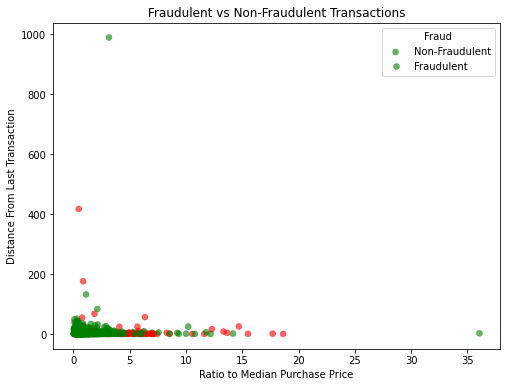

In [94]:
# Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility

# Plot the scatter plot with 'distance_from_last_transaction' on the y-axis and 'ratio_to_median_purchase_price' on the x-axis
# Color the points based on fraud status using 'hue'
sns.scatterplot(data=transaction_data_cleaned, 
                x='ratio_to_median_purchase_price', 
                y='distance_from_last_transaction', 
                hue='fraud', 
                palette=['green', 'red'],  # Green for non-fraudulent, Red for fraudulent
                alpha=0.6,  # Adjust transparency to allow better visibility of overlapping points
                edgecolor=None)  # Remove edgecolor for a cleaner look

# Set the title and labels for the plot
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Distance From Last Transaction')

# Display the legend to indicate what colors represent fraudulent vs non-fraudulent transactions
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])

# Show the plot
plt.show()

In [95]:
## Can we predict if a transaction is a fraud?

In [96]:
# Prompt given: set the variable X to be the dataframe but drop 'fraud' and set the axis to 1, 
# and set the variable y to just be the 'fraud' column of the dataframe, 
# then use train_test_split to split the data into training and testing sets

In [97]:
# Define the features (X) and the target (y)
X = transaction_data_cleaned.drop('fraud', axis=1)  # Drop the 'fraud' column to create the feature set
y = transaction_data_cleaned['fraud']  # Target variable is the 'fraud' column

# Split the data into training and testing sets
# Use stratify=y to maintain the same class distribution in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
954,39.904167,0.367448,0.260833,1.0,1.0,0.0,1.0
143,2.660649,0.657162,3.837860,1.0,0.0,0.0,1.0
643,48.902727,0.205816,1.307000,1.0,0.0,1.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0
793,676.702348,1.209733,6.948586,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
685,5.916343,5.099247,0.419779,1.0,0.0,0.0,0.0
722,23.517527,3.513485,0.241444,1.0,0.0,0.0,0.0
173,3.273426,1.056948,1.694281,1.0,0.0,0.0,1.0
499,7.387696,1.598827,0.847218,1.0,0.0,0.0,1.0


In [99]:
y_train

954    0
143    0
643    0
15     0
793    1
      ..
685    0
722    0
173    0
499    0
593    0
Name: fraud, Length: 781, dtype: int64

In [100]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
782,0.701100,0.540487,1.754568,0.0,0.0,0.0,1.0
51,43.281314,3.367793,0.676058,1.0,1.0,1.0,1.0
197,4.586564,3.365070,2.454288,1.0,0.0,0.0,0.0
550,4.403263,0.173726,0.641169,1.0,0.0,0.0,0.0
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
436,6.498016,0.228995,0.171750,1.0,0.0,0.0,0.0
868,9.258344,0.633609,0.066744,1.0,1.0,0.0,1.0
65,17.797888,1.395508,2.880479,1.0,1.0,0.0,0.0
743,5.599947,2.477098,5.956153,1.0,0.0,0.0,0.0


In [101]:
y_test

782    0
51     0
197    0
550    0
412    1
      ..
436    0
868    0
65     0
743    0
390    0
Name: fraud, Length: 196, dtype: int64

In [102]:
# There are 196 transactions in the testing set

In [103]:
## Never Fraud Model

In [104]:
# Create a list of zeros representing the prediction of "never fraud"
y_pred_never_fraud = [0] * len(y_test)

# Print the first 100 predictions
print(y_pred_never_fraud[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [105]:
## Basic modeling with k-NN

In [106]:
# Create a k-Nearest Neighbors (KNN) classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test)

# Print the first 100 predictions
print("First 100 predictions (KNN):", y_pred_knn[:100])

First 100 predictions (KNN): [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [107]:
## Model Evaluation

In [108]:
# Prompt given: now make a confusion matrix called conf_matrix_never_fraud using y_test, y_pred_never_fraud, 
# then make a heatmap using sns with the title 'Confusion Matrix - Never Fraud Model', 
# the x-axis labeled 'Predicted' and the y-axis labeled 'Actual'. Finally, print a classification report

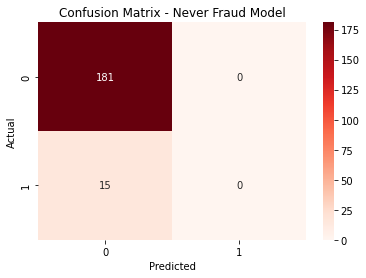

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



In [109]:
# Create the confusion matrix for the "Never Fraud" model
conf_matrix_never_fraud = confusion_matrix(y_test, y_pred_never_fraud)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix_never_fraud, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title("Confusion Matrix - Never Fraud Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report for the "Never Fraud" model
print(classification_report(y_test, y_pred_never_fraud, zero_division = 0))

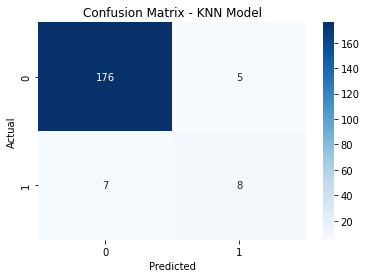

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       181
           1       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



In [110]:
# Create the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report for the KNN model
print(classification_report(y_test, y_pred_knn))

In [111]:
# Prompt given: now, calculate accuracy, precision, recall, and f1 score for both 'Never Fraud' and k-NN, 
# and make the variables the name of the metric followed by either never_fraud or knn

In [112]:
# Metrics for the "Never Fraud" model
accuracy_never_fraud = accuracy_score(y_test, y_pred_never_fraud)
precision_never_fraud = precision_score(y_test, y_pred_never_fraud, zero_division = 0)
recall_never_fraud = recall_score(y_test, y_pred_never_fraud)
f1_never_fraud = f1_score(y_test, y_pred_never_fraud)

# Metrics for the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# List of metric names
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Scores for the KNN model
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Scores for the "Never Fraud" model
never_fraud_scores = [accuracy_never_fraud, precision_never_fraud, recall_never_fraud, f1_never_fraud]

In [113]:
# Create a DataFrame to compare the metrics for the two models
comparison_transaction_data = pd.DataFrame({'Metric': metrics,'k-NN': knn_scores,'Never Fraud': never_fraud_scores})

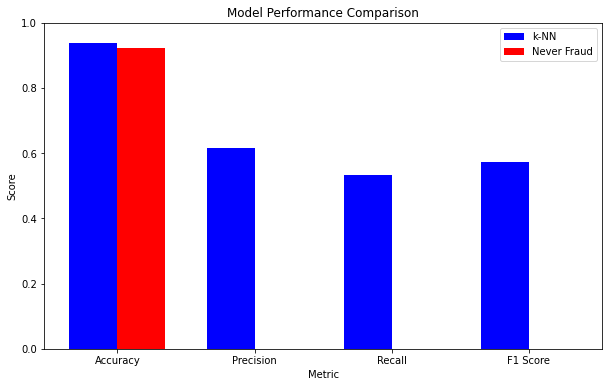

In [114]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and index for positioning the bars
bar_width = 0.35
index = range(len(metrics))

# Plot bars for k-NN and Never Fraud
bar1 = ax.bar(index, knn_scores, bar_width, label='k-NN', color='blue')
bar2 = ax.bar([i + bar_width for i in index], never_fraud_scores, bar_width, label='Never Fraud', color='red')

# Set labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')

# Set x-ticks to be in the middle of the grouped bars
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)

# Set the y-axis limit from 0 to 1 (for score range)
ax.set_ylim(0, 1)

# Add legend
ax.legend()

# Display the plot
plt.show()